# Statistical Thinking in Python (Part 2)

## Chapter 5

In [53]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from utils import ecdf, pearson_r, diff_of_means, permutation_sample, draw_perm_reps, draw_bs_reps

# Seed random number generator
np.random.seed(42)

In [54]:
df_1975 = pd.read_csv("finch_beaks_1975.csv")
df_1975["year"] = 1975

df_1975

,band,species,"Beak length, mm","Beak depth, mm",year
0,2,fortis,9.40,8.00,1975
1,9,fortis,9.20,8.30,1975
2,12,fortis,9.50,7.50,1975
3,15,fortis,9.50,8.00,1975
4,305,fortis,11.50,9.90,1975
...,...,...,...,...,...
398,20225,scandens,14.55,9.45,1975
399,20252,scandens,14.05,9.05,1975
400,20255,scandens,14.45,8.75,1975
401,20266,scandens,15.05,9.45,1975


In [55]:
df_2012 = pd.read_csv("finch_beaks_2012.csv")
df_2012["year"] = 2012
df_2012.rename(
    columns={
        "blength": "Beak length, mm",
        "bdepth": "Beak depth, mm"
    },
    inplace=True
)

df_2012

,band,species,"Beak length, mm","Beak depth, mm",year
0,19022,fortis,10.0,8.5,2012
1,19028,fortis,12.5,8.9,2012
2,19032,fortis,9.3,7.5,2012
3,19041,fortis,10.3,9.6,2012
4,19044,fortis,11.0,9.2,2012
...,...,...,...,...,...
243,21295,scandens,14.2,9.3,2012
244,21297,scandens,13.0,9.8,2012
245,21340,scandens,14.6,8.9,2012
246,21342,scandens,13.1,9.8,2012


In [56]:
df_all = pd.concat([df_1975, df_2012])
df_all

,band,species,"Beak length, mm","Beak depth, mm",year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975
...,...,...,...,...,...
243,21295,scandens,14.2,9.3,2012
244,21297,scandens,13.0,9.8,2012
245,21340,scandens,14.6,8.9,2012
246,21342,scandens,13.1,9.8,2012


In [60]:
df = df_all[df_all["species"]=="scandens"].copy()
df = df.reset_index(drop=True)
df.columns = ["band", "species", "beak_length", "beak_depth", "year"]

df

,band,species,beak_length,beak_depth,year
0,302,scandens,13.9,8.4,1975
1,304,scandens,14.0,8.8,1975
2,306,scandens,12.9,8.4,1975
3,310,scandens,13.5,8.0,1975
4,317,scandens,12.9,7.9,1975
...,...,...,...,...,...
209,21295,scandens,14.2,9.3,2012
210,21297,scandens,13.0,9.8,2012
211,21340,scandens,14.6,8.9,2012
212,21342,scandens,13.1,9.8,2012


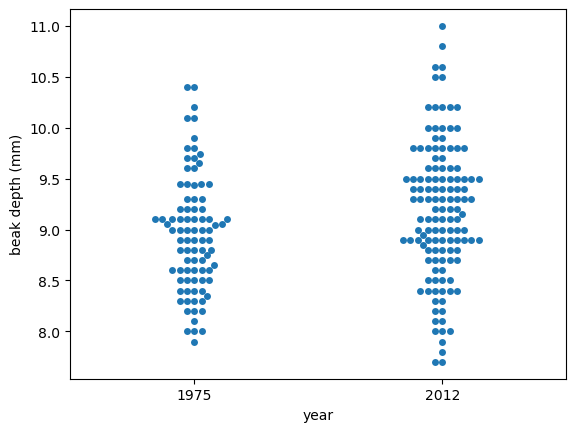

In [62]:
# Create bee swarm plot
_ = sns.swarmplot(x="year", y="beak_depth", data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot

plt.show()